In [1]:
import numpy as np 

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
from tensorflow.keras.datasets import reuters
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

/home/sambaran/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sambaran/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
def vectorize(sequences, dimension = 10000): 
    '''
    This function takes the input and converts it to a vectorized sequence with shape len(data) * dimension
    '''
    length = len(sequences)
    x_train = np.zeros((length, dimension), dtype = np.int32)
    for i,sequence in enumerate(sequences): 
        x_train[i,sequence] = 1
    return x_train

In [5]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [6]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

Using TensorFlow backend.


In [7]:
indices = np.random.permutation(len(x_train))
val_len = int(0.3*len(x_train))
x_val = x_train[indices[:val_len]]
y_val = y_train[indices[:val_len]]
x_train = x_train[indices[val_len:]]
y_train = y_train[indices[val_len:]]

In [8]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape= (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation ='softmax'))

2021-12-18 00:07:18.541366: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-18 00:07:18.541876: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-18 00:07:18.545734: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 1,295,534
Trainable params: 1,295,534
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss= 'categorical_crossentropy', optimizer = Adam(learning_rate=1e-3), metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs= 20, batch_size = 512, validation_data=(x_val, y_val))

2021-12-18 00:07:19.039247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-18 00:07:19.059837: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/20
13/13 [==============================] - 2s 97ms/step - loss: 3.5838 - accuracy: 0.2536 - val_loss: 2.5328 - val_accuracy: 0.3679
Epoch 2/20
13/13 [==============================] - 1s 63ms/step - loss: 2.2622 - accuracy: 0.4634 - val_loss: 1.6354 - val_accuracy: 0.6347
Epoch 3/20
13/13 [==============================] - 1s 57ms/step - loss: 1.5242 - accuracy: 0.6669 - val_loss: 1.3405 - val_accuracy: 0.7146
Epoch 4/20
13/13 [==============================] - 1s 64ms/step - loss: 1.1240 - accuracy: 0.7477 - val_loss: 1.1813 - val_accuracy: 0.7468
Epoch 5/20
13/13 [==============================] - 1s 66ms/step - loss: 0.8888 - accuracy: 0.8039 - val_loss: 1.0843 - val_accuracy: 0.7721
Epoch 6/20
13/13 [==============================] - 1s 59ms/step - loss: 0.6823 - accuracy: 0.8472 - val_loss: 1.0201 - val_accuracy: 0.7795
Epoch 7/20
13/13 [==============================] - 1s 52ms/step - loss: 0.4807 - accuracy: 0.8938 - val_loss: 1.0087 - val_accuracy: 0.7925
Epoch 8/20
13

In [12]:
history = model.history
history = history.history

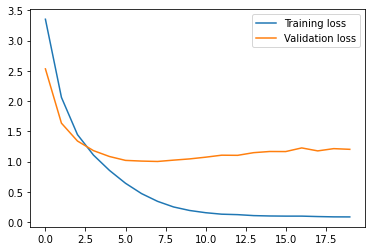

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(20), history['loss'], label = 'Training loss')
plt.plot(range(20), history['val_loss'], label = 'Validation loss')
plt.legend()

In [14]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 3s 37ms/step - loss: 1.2876 - accuracy: 0.7818


[1.28755784034729, 0.7818343639373779]